In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import matplotlib.pyplot as plt
import gym


from src.utils.Config import Config
from src.utils.Logging import Logger
from src.components.memory import ReplayBuffer
from src.networks.models import QNetwork, NoisyQNetwork, NoisyDualingQNetwork
from src.utils.misc import train, watch

In [41]:
# import math, random

# import gym
# import numpy as np

# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.autograd as autograd 
# import torch.nn.functional as F

# USE_CUDA = torch.cuda.is_available()
# Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

In [42]:
# class NoisyLinear(nn.Module):
#     def __init__(self, in_features, out_features, std_init=0.4):
#         super(NoisyLinear, self).__init__()
        
#         self.in_features  = in_features
#         self.out_features = out_features
#         self.std_init     = std_init
        
#         self.weight_mu    = nn.Parameter(torch.FloatTensor(out_features, in_features))
#         self.weight_sigma = nn.Parameter(torch.FloatTensor(out_features, in_features))
#         self.register_buffer('weight_epsilon', torch.FloatTensor(out_features, in_features))
        
#         self.bias_mu    = nn.Parameter(torch.FloatTensor(out_features))
#         self.bias_sigma = nn.Parameter(torch.FloatTensor(out_features))
#         self.register_buffer('bias_epsilon', torch.FloatTensor(out_features))
        
#         self.reset_parameters()
#         self.reset_noise()
    
#     def forward(self, x):
#         if self.training: 
#             weight = self.weight_mu + self.weight_sigma.mul(Variable(self.weight_epsilon))
#             bias   = self.bias_mu   + self.bias_sigma.mul(Variable(self.bias_epsilon))
#         else:
#             weight = self.weight_mu
#             bias   = self.bias_mu
        
#         return F.linear(x, weight, bias)
    
#     def reset_parameters(self):
#         mu_range = 1 / math.sqrt(self.weight_mu.size(1))
        
#         self.weight_mu.data.uniform_(-mu_range, mu_range)
#         self.weight_sigma.data.fill_(self.std_init / math.sqrt(self.weight_sigma.size(1)))
        
#         self.bias_mu.data.uniform_(-mu_range, mu_range)
#         self.bias_sigma.data.fill_(self.std_init / math.sqrt(self.bias_sigma.size(0)))
    
#     def reset_noise(self):
#         epsilon_in  = self._scale_noise(self.in_features)
#         epsilon_out = self._scale_noise(self.out_features)
        
#         self.weight_epsilon.copy_(epsilon_out.ger(epsilon_in))
#         self.bias_epsilon.copy_(self._scale_noise(self.out_features))
    
#     def _scale_noise(self, size):
#         x = torch.randn(size)
#         x = x.sign().mul(x.abs().sqrt())
#         return x

In [43]:
# class NoisyDQN(nn.Module):
#     def __init__(self, num_inputs, num_actions, seed, fc1, fc2):
#         super(NoisyDQN, self).__init__()
        
#         self.linear =  nn.Linear(num_inputs, 128)
#         self.noisy1 = NoisyLinear(128, 128)
#         self.noisy2 = NoisyLinear(128, num_actions)
        
#     def forward(self, x):
#         x = F.relu(self.linear(x))
#         x = F.relu(self.noisy1(x))
#         x = self.noisy2(x)
#         return x
    
#     def act(self, state):
#         state   = Variable(torch.FloatTensor(state).unsqueeze(0), volatile=True)
#         q_value = self.forward(state)
#         action  = q_value.max(1)[1].data[0]
#         return action
    
#     def reset_noise(self):
#         self.noisy1.reset_noise()
#         self.noisy2.reset_noise()

In [44]:
config = Config()

config.env = gym.make('CartPole-v1')

config.win_condition = 195.0
config.memory = ReplayBuffer
config.model = NoisyQNetwork
config.print_config()
config.noisy = True

logger = Logger(config)

env: 		EnvSpec(CartPole-v1)
win condition: 	195.0
state space	(4,)
action space	2
device: 	cpu
seed: 		123456789
n_episodes: 	2000
max_t: 		1000
eps_start: 	1.0
eps_end: 	0.01
eps_decay: 	0.995
eps_greedy: 	True
noisy: 		False
tau: 		0.001
gamma: 		0.99
lr: 		0.0005
memory: 	<class 'src.components.memory.ReplayBuffer'>
batch_size: 	64
buffer_size: 	100000
lr_annealing: 	False
learn_every: 	4
double_dqn: 	False
model: 		<class 'src.networks.models.NoisyQNetwork'>
save_loc: 	None
Logging at: logs/CartPole-v1/experiment-2020-04-19_11_10_48


In [45]:
train(config, logger)

1
1
1
1
1
1
1
1
1
Epi: 1	Average Score: 9.0000	Mean: 9.0000	Duration: 0.0106	#t_s: 8.00001
1
1
1
1
1
1
1
1
1
Epi: 2	Average Score: 9.5000	Mean: 10.0000	Duration: 0.0101	#t_s: 9.00001
1
1
1
1
1
1
1
1
Epi: 3	Average Score: 9.3333	Mean: 9.0000	Duration: 0.0087	#t_s: 8.00001
1
1
1
1
1
1
1
Epi: 4	Average Score: 9.0000	Mean: 8.0000	Duration: 0.0078	#t_s: 7.00001
1
1
1
1
1
1
1
1
1
Epi: 5	Average Score: 9.2000	Mean: 10.0000	Duration: 0.0086	#t_s: 9.00001
1
1
1
1
1
1
1
1
1
Epi: 6	Average Score: 9.3333	Mean: 10.0000	Duration: 0.0114	#t_s: 9.00001
1
1
1
1
1
1
1
1
Epi: 7	Average Score: 9.2857	Mean: 9.0000	Duration: 0.0096	#t_s: 8.00001
1
1
1
1
1
1
1
1
1
Epi: 8	Average Score: 9.3750	Mean: 10.0000	Duration: 0.0500	#t_s: 9.00001
1
1
1
1
1
1
1
1
1
Epi: 9	Average Score: 9.4444	Mean: 10.0000	Duration: 0.0308	#t_s: 9.00001
1
1
1
1
1
1
1
1
1
Epi: 10	Average Score: 9.5000	Mean: 10.0000	Duration: 0.0262	#t_s: 9.00001
1
1
1
1
1
1
1
1
Epi: 11	Average Score: 9.4545	Mean: 9.0000	Duration: 0.0269	#t_s: 8.00001
1

KeyboardInterrupt: 

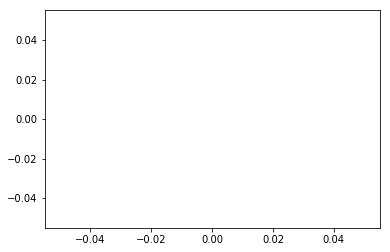

In [4]:
plt.plot(logger.score)

In [5]:
watch(config, logger.log_file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'logs/CartPole-v1/experiment-2020-04-16_18_05_10/checkpoint.pth'